# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# Load the classes
import csv
with open('signnames.csv') as f:
    sign_names = list(csv.reader(f))[1:]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sign_names)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


---
### Sample Data Visualization & Enhancement

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

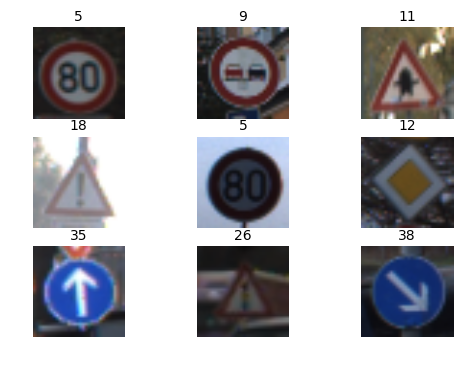

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import randint
# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualize a traffic sign
img_list = []
for i in range(9):
    plt.subplot(3,3,i+1)
    num = randint(0,n_train)
    img_list.append(num)
    image = X_train[num]
    plt.imshow(image)
    plt.title(sign_names[y_train[num]][0],fontsize=10)
    #plt.title("#{} -".format(num) + sign_names[y_train[num]][1] + ' - Before Enhancement')
    plt.axis('off')
plt.show()

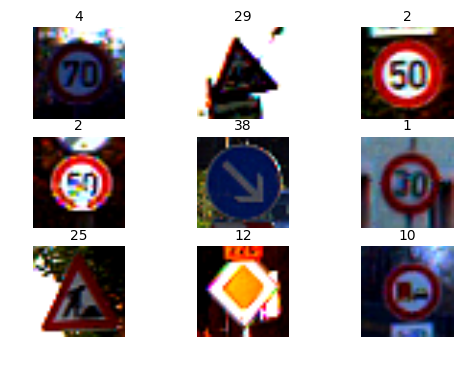

In [4]:
# After enhancement
from PIL import Image,ImageEnhance
def enhance(image):
    img = Image.fromarray(image)
    factor = 2.0
    color = ImageEnhance.Color(img)
    img = color.enhance(factor)
    sharpness = ImageEnhance.Sharpness(img)
    img = sharpness.enhance(factor)
    contrast = ImageEnhance.Contrast(img)
    img = contrast.enhance(factor)
    return img

for i in range(9):
    plt.subplot(3,3,i+1)
    num = img_list[i]
    image = X_train[num]
    plt.imshow(enhance(image))
    plt.title(sign_names[y_train[num]][0],fontsize=10)
    plt.axis('off')
plt.show()

# Enhance all images in training/test sets
ENHANCE = False
if ENHANCE:
    for i in range(n_train):
        X_train[i] = enhance(X_train[i])
    print("Training images enhanced!")

    for i in range(n_test):
        X_test[i] = enhance(X_test[i])
    print("Test images enhanced!")


## Histogram of training dataset
Here we check to see how many examples we have for each dataset

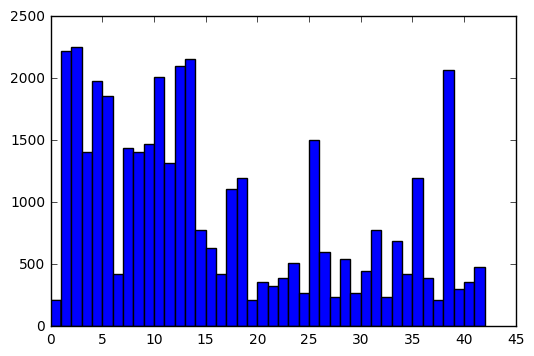

In [5]:
plt.hist(y_train,bins=range(n_classes))
plt.show()

## Data Augmentation
In this section, we try to add more data examples where there are fewer than *THRESHOLD* data cases. 

Case 0 has fewer than 800: 210.. Adding 590
(39799, 32, 32, 3) (39799,)
Case 6 has fewer than 800: 420.. Adding 380


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 39799


(40179, 32, 32, 3) (40179,)
Case 14 has fewer than 800: 780.. Adding 20


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 40179


(40199, 32, 32, 3) (40199,)
Case 15 has fewer than 800: 630.. Adding 170


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 40199


(40369, 32, 32, 3) (40369,)
Case 16 has fewer than 800: 420.. Adding 380


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 40369


(40749, 32, 32, 3) (40749,)
Case 19 has fewer than 800: 210.. Adding 590


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 40749


(41339, 32, 32, 3) (41339,)
Case 20 has fewer than 800: 360.. Adding 440


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 41339


(41779, 32, 32, 3) (41779,)
Case 21 has fewer than 800: 330.. Adding 470


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 41779


(42249, 32, 32, 3) (42249,)
Case 22 has fewer than 800: 390.. Adding 410


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 42249


(42659, 32, 32, 3) (42659,)
Case 23 has fewer than 800: 510.. Adding 290


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 42659


(42949, 32, 32, 3) (42949,)
Case 24 has fewer than 800: 270.. Adding 530


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 42949


(43479, 32, 32, 3) (43479,)
Case 26 has fewer than 800: 600.. Adding 200


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 43479


(43679, 32, 32, 3) (43679,)
Case 27 has fewer than 800: 240.. Adding 560


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 43679


(44239, 32, 32, 3) (44239,)
Case 28 has fewer than 800: 540.. Adding 260


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 44239


(44499, 32, 32, 3) (44499,)
Case 29 has fewer than 800: 270.. Adding 530


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 44499


(45029, 32, 32, 3) (45029,)
Case 30 has fewer than 800: 450.. Adding 350


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 45029


(45379, 32, 32, 3) (45379,)
Case 31 has fewer than 800: 780.. Adding 20


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 45379


(45399, 32, 32, 3) (45399,)
Case 32 has fewer than 800: 240.. Adding 560


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 45399


(45959, 32, 32, 3) (45959,)
Case 33 has fewer than 800: 689.. Adding 111


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 45959


(46070, 32, 32, 3) (46070,)
Case 34 has fewer than 800: 420.. Adding 380


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 46070


(46450, 32, 32, 3) (46450,)
Case 36 has fewer than 800: 390.. Adding 410


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 46450


(46860, 32, 32, 3) (46860,)
Case 37 has fewer than 800: 210.. Adding 590


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 46860


(47450, 32, 32, 3) (47450,)
Case 39 has fewer than 800: 300.. Adding 500


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 47450


(47950, 32, 32, 3) (47950,)
Case 40 has fewer than 800: 360.. Adding 440


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 47950


(48390, 32, 32, 3) (48390,)
Case 41 has fewer than 800: 480.. Adding 320


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 48390


(48710, 32, 32, 3) (48710,)


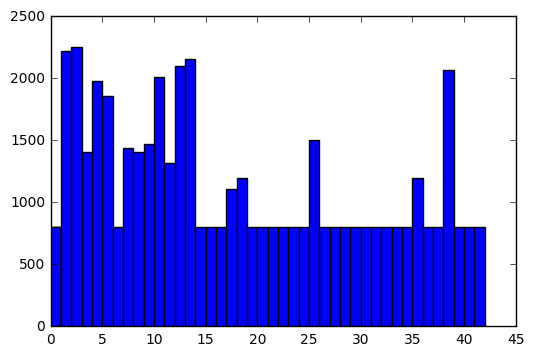

In [6]:
import numpy as np
from random import randint
THRESHOLD = 800
yhist,cases = np.histogram(y_train,bins=range(n_classes))

# Function to return a random image from training set that corresponds to provided case
A = np.array(range(len(y_train)))
def get_random_case(c,num=1):
    return np.random.choice(A[y_train==c],num)

def transform(img):
    return np.array([img])

for y,c in zip(yhist,cases):
    diff = THRESHOLD-y
    if diff>0:
        print("Case {} has fewer than {}: {}.. Adding {}".format(c,THRESHOLD,y,diff))
        
        # Get random images for this case
        rand_imgs = get_random_case(c,diff)
        
        # Apply a small random transformation
        for ri in rand_imgs:
            imgi_mod = transform(X_train[ri])
            
            # Store it in traning set
            X_train=np.concatenate((X_train,imgi_mod),axis=0)
            y_train=np.concatenate((y_train,[c]),axis=0)
        print(X_train.shape,y_train.shape)
        
# Plot new histogram
plt.hist(y_train,bins=range(n_classes))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=37)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

def LeNet(x,debug=True):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    f1 = tf.Variable(tf.truncated_normal([5,5,3,6],mu,sigma))
    b1 = tf.Variable(tf.zeros(6))
    strides = [1,1,1,1]
    padding = 'VALID'
    l1 = tf.nn.conv2d(x,f1,strides,padding)
    l1 = tf.nn.bias_add(l1,b1)
    if debug: print("Layer 1: ",l1)
    
    # Activation.
    l1 = tf.nn.relu(l1)
    if debug: print("Layer 1 - ReLU: ",l1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    ksize = [1,2,2,1]
    strides = [1,2,2,1]
    padding = 'VALID'    
    l1 = tf.nn.max_pool(l1, ksize, strides=strides, padding=padding)
    if debug: print("Layer 1 - Maxpool: ",l1)

    # Layer 2: Convolutional. Output = 10x10x16.
    f2 = tf.Variable(tf.truncated_normal([5,5,6,16],mu,sigma))
    b2 = tf.Variable(tf.zeros(16))
    strides = [1,1,1,1]
    padding = 'VALID'
    l2 = tf.nn.conv2d(l1,f2,strides,padding)    
    l2 = tf.nn.bias_add(l2,b2)
    if debug: print("\nLayer 2: ",l2)
    
    # Activation.
    l2 = tf.nn.relu(l2)
    if debug: print("Layer 2 - ReLU: ",l2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    ksize = [1,2,2,1]
    strides = [1,2,2,1]
    padding = 'VALID'    
    l2 = tf.nn.max_pool(l2, ksize, strides=strides, padding=padding)
    if debug: print("Layer 2 - Maxpool: ",l2)
    
    # Flatten. Input = 5x5x16. Output = 400.
    l2f = flatten(l2)
    if debug: print("Layer 2 - Flatten: ",l2f)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    w3 = tf.Variable(tf.truncated_normal([400,120],mu,sigma))
    b3 = tf.Variable(tf.zeros(120))
    l3 = tf.add(tf.matmul(l2f,w3),b3)
    if debug: print("\nLayer 3: ",l3)
    
    # Activation.
    l3 = tf.nn.sigmoid(l3)
    if debug: print("Layer 3 - Sigmoid: ",l3)

    # Dropout (Only during training)
    l3 = tf.nn.dropout(l3,keep_prob)
        
    # Layer 4: Fully Connected. Input = 120. Output = 43.
    w4 = tf.Variable(tf.truncated_normal([120,43],mu,sigma))
    b4 = tf.Variable(tf.zeros(43))
    l4 = tf.add(tf.matmul(l3,w4),b4)
    if debug: print("\nLayer 4 - Fully Connected: ",l4)
    
    return l4
    
    ## Activation.
    #l4 = tf.nn.relu(l4)
    #if debug: print("Layer 4 - ReLU: ",l4)
    #
    ## Layer 5: Fully Connected. Input = 84. Output = 43.
    #w5 = tf.Variable(tf.truncated_normal([84,43],mu,sigma))
    #b5 = tf.Variable(tf.zeros(43))
    #logits = tf.add(tf.matmul(l4,w5),b5)
    #if debug: print("\nLayer 5 - Fully connected: ",logits)
    #
    #return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [29]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.0004
EPOCHS = 50
BATCH_SIZE = 100
KEEP_PROB = 0.7

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Layer 1:  Tensor("BiasAdd_6:0", shape=(?, 28, 28, 6), dtype=float32)
Layer 1 - ReLU:  Tensor("Relu_6:0", shape=(?, 28, 28, 6), dtype=float32)
Layer 1 - Maxpool:  Tensor("MaxPool_6:0", shape=(?, 14, 14, 6), dtype=float32)

Layer 2:  Tensor("BiasAdd_7:0", shape=(?, 10, 10, 16), dtype=float32)
Layer 2 - ReLU:  Tensor("Relu_7:0", shape=(?, 10, 10, 16), dtype=float32)
Layer 2 - Maxpool:  Tensor("MaxPool_7:0", shape=(?, 5, 5, 16), dtype=float32)
Layer 2 - Flatten:  Tensor("Flatten_3/Reshape:0", shape=(?, 400), dtype=float32)

Layer 3:  Tensor("Add_6:0", shape=(?, 120), dtype=float32)
Layer 3 - Sigmoid:  Tensor("Sigmoid_3:0", shape=(?, 120), dtype=float32)

Layer 4 - Fully Connected:  Tensor("Add_7:0", shape=(?, 43), dtype=float32)


In [30]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
import os
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:KEEP_PROB})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, os.path.join('.','lenet.save'))
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.304

EPOCH 2 ...
Validation Accuracy = 0.622

EPOCH 3 ...
Validation Accuracy = 0.798

EPOCH 4 ...
Validation Accuracy = 0.875

EPOCH 5 ...
Validation Accuracy = 0.906

EPOCH 6 ...
Validation Accuracy = 0.922

EPOCH 7 ...
Validation Accuracy = 0.937

EPOCH 8 ...
Validation Accuracy = 0.950



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [27]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import os
print(os.path.join('.','lenet.save'))
print(os.path.dirname('lenet'))

./lenet.save



In [28]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.941


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [16]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# Result Logs

## v1.0 - Jan 21
- Original LeNet Architecture, No image enhancements, No augmentation, Using all RGB channels
- Epochs = 10
- VA = 0.959
- TA = 0.887

## V1.1 - Jan 21
- Added enhancement. Reduced accuracy
- VA = 0.930
- TA = 0.853

## V1.2 - Jan 21
- Added Dropout, No enhancement or normalization
- rate = 0.0005
- EPOCHS = 20
- BATCH_SIZE = 100
- KEEP_PROB = 0.75
- VA = 0.973
- TA = 0.913


## V1.3 - Jan 21
- Moved dropout to layer 3 (FC) instead of layer 4
- rate = 0.0005
- EPOCHS = 20
- BATCH_SIZE = 100
- KEEP_PROB = 0.7
- VA = 0.978
- TA = 0.920

## V1.4 - Jan 22
- Data augmentation (Added more images [duplicates i.e. without any transformations] where number of cases < 500)
- Inreased EPOCHS to 40
- VA = 0.990
- TA = 0.939

## V1.5 - Jan 22
- Increased threshold to 800
- Increaed KEEP_PROB to 0.6 (Increasing to 0.7 also gave almost same result)
- VA = 0.991
- TA = 0.943
